## Ejercicios de Matplotlib

In [78]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatch

from pathlib import Path

pd.set_option('display.max_columns', 150)

%matplotlib inline

In [45]:
crimenes = pd.read_csv('../Datos/Chicago_Crimes_2017.csv')
print(data.shape)
crimenes.head()

(11357, 22)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,Location Description,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,X Coordinate,Y Coordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10801165,JA100077,01/01/2017 01:00:00 AM,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,1824,18.0,42.0,8.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
1,10801166,JA100115,01/01/2017 01:23:00 AM,084XX S SANGAMON ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,613,6.0,21.0,71.0,24,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
2,10801090,JA100010,01/01/2017 12:01:00 AM,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,314,3.0,5.0,42.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
3,10801101,JA100031,01/01/2017 12:00:00 AM,074XX S SOUTH CHICAGO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,324,3.0,5.0,69.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
4,10801104,JA100015,01/01/2017 12:00:00 AM,004XX W 66TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,722,7.0,20.0,68.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN


## Ejercicio 1
Genera un gráfico de barras que contenga el nº de siniestros ocurrido en cada mes del año. 

In [50]:
# Primero creamos una tabla con el número de crímenes por cada mes
# Pasamos la columna date a tipo fecha 
# crimenes['Date']=crimenes['Date'].astype(str)
crimenes['Date']=pd.to_datetime(crimenes['Date'], format='%m/%d/%Y %I:%M:%S %p')

crimenes['Month']= crimenes['Date'].dt.month

crimenes['Date']



0       2017-01-01 01:00:00
1       2017-01-01 01:23:00
2       2017-01-01 00:01:00
3       2017-01-01 00:00:00
4       2017-01-01 00:00:00
                ...        
11352   2017-01-18 12:00:00
11353   2017-01-18 00:45:00
11354   2017-01-18 09:45:00
11355   2017-01-18 10:12:00
11356   2017-01-02 09:14:00
Name: Date, Length: 11357, dtype: datetime64[ns]

In [54]:
# Visto que todos los crímenes se perpretaron en un mes,
# vamos a generar de manera aleatoria los valores del 1 al 12 de la columna Month
crimenes['Month'] = np.random.randint(1, 13, crimenes.shape[0])
crimenes['Month']

0         1
1         8
2        12
3         9
4         7
         ..
11352     7
11353     7
11354     6
11355     2
11356     3
Name: Month, Length: 11357, dtype: int32

In [55]:
crimenes_mes=crimenes.groupby('Month').size()
crimenes_mes

Month
1     927
2     907
3     986
4     952
5     897
6     920
7     980
8     980
9     990
10    899
11    937
12    982
dtype: int64

Text(0.5, 1.0, 'Crímenes en Chicago')

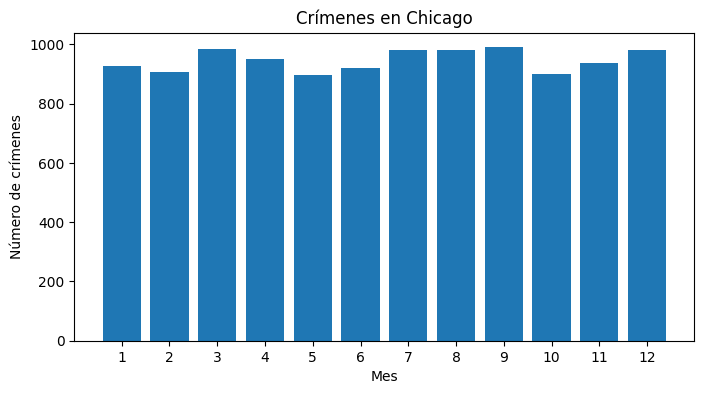

In [73]:
fig, ax = plt.subplots(figsize = (8,4))
ax.bar(x=crimenes_mes.index, height=crimenes_mes.values)

ax.set_xticks(crimenes_mes.index.values)

plt.ylabel('Número de crímenes')
plt.xlabel('Mes')
plt.title('Crímenes en Chicago')


## Ejercicio 2

Añade al gráfico anterior, usando puntos, el nº de siniestros cuyo Primary Type = 'Battery'. 
- Representa esos puntos usando el eje derecho. 
- Muestra una leyenda con el significado de ambos


In [74]:
crimes_battery=crimenes[crimenes['PrimaryType']=="BATTERY"].groupby('Month').size()
crimes_battery

Month
1     171
2     189
3     174
4     158
5     154
6     165
7     177
8     181
9     170
10    132
11    150
12    153
dtype: int64

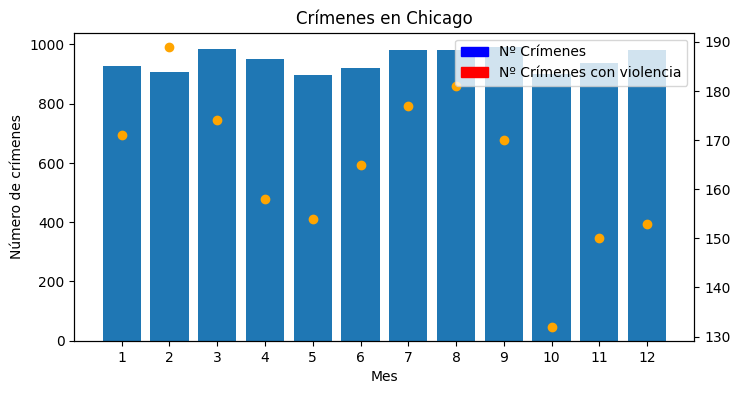

In [79]:

fig, ax = plt.subplots(figsize = (8,4))
ax.bar(x=crimenes_mes.index, height=crimenes_mes.values)

ax.set_xticks(crimenes_mes.index.values)

plt.ylabel('Número de crímenes')
plt.xlabel('Mes')
plt.title('Crímenes en Chicago')

ax1=ax.twinx()
ax1.scatter(x=crimes_battery.index, y=crimes_battery.values, c='orange', label='Battery Crimes')
# El gráfico no tiene lógica debido ya que hay meses en los que hay más crímenes de tipo battery que total de crímenes

bar=mpatch.Patch(color='blue', label='Nº Crímenes')
bar2=mpatch.Patch(color='red', label='Nº Crímenes con violencia')

plt.legend(handles=[bar, bar2])


## Ejercicio 3

Filtra solo los siniestros cuyo Primary Type son "THEFT", "BATTERY", "CRIMINAL DAMAGE" o "OTHER OFFENSE". Luego, genera 2 gráficos en el mismo fig.

- El primero, será un gráfico de tartas que muestre el % que representa cada tipo en el dataset.
- El segundo, será un gráfico de puntos, representando el nº de siniestros de cada tipo en cada mes.


In [90]:
tarta=crimenes.query('PrimaryType in ("THEFT","BATTERY","CRIMINAL DAMAGE","OTHER OFFENSE")')
tarta.shape

(6646, 23)

In [92]:
tarta=tarta['PrimaryType'].value_counts(normalize=True)
tarta

PrimaryType
THEFT              0.375113
BATTERY            0.297021
CRIMINAL DAMAGE    0.196359
OTHER OFFENSE      0.131508
Name: proportion, dtype: float64

In [95]:
tabla_puntos=crimenes.groupby(['PrimaryType', 'Month']).size().unstack().T
tabla_puntos

PrimaryType,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,HOMICIDE,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON-CRIMINAL,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,58.0,171.0,55.0,NaN,9.0,105.0,17.0,55.0,1.0,3.0,NaN,NaN,NaN,62.0,45.0,NaN,6.0,69.0,2.0,NaN,4.0,47.0,2.0,NaN,201.0,15.0
2,1.0,56.0,189.0,43.0,1.0,2.0,93.0,25.0,52.0,3.0,6.0,NaN,NaN,NaN,56.0,26.0,NaN,8.0,70.0,2.0,NaN,5.0,45.0,2.0,NaN,209.0,13.0
3,1.0,69.0,174.0,58.0,NaN,4.0,103.0,25.0,52.0,3.0,5.0,1.0,1.0,NaN,59.0,39.0,NaN,11.0,72.0,3.0,NaN,6.0,55.0,NaN,2.0,230.0,13.0
4,1.0,75.0,158.0,54.0,NaN,4.0,98.0,35.0,58.0,1.0,1.0,2.0,1.0,NaN,55.0,32.0,NaN,8.0,72.0,5.0,NaN,7.0,56.0,1.0,NaN,211.0,17.0
5,1.0,56.0,154.0,53.0,NaN,4.0,91.0,30.0,59.0,2.0,5.0,NaN,NaN,NaN,55.0,31.0,1.0,8.0,63.0,3.0,NaN,3.0,59.0,4.0,2.0,198.0,15.0
6,NaN,62.0,165.0,63.0,2.0,4.0,101.0,23.0,49.0,1.0,5.0,NaN,1.0,1.0,68.0,35.0,1.0,17.0,66.0,2.0,NaN,2.0,39.0,1.0,NaN,202.0,10.0
7,3.0,59.0,177.0,52.0,NaN,3.0,135.0,34.0,60.0,6.0,5.0,1.0,1.0,NaN,56.0,29.0,NaN,6.0,79.0,4.0,NaN,2.0,53.0,5.0,1.0,190.0,19.0
8,2.0,72.0,181.0,62.0,NaN,5.0,108.0,28.0,53.0,2.0,5.0,NaN,NaN,NaN,53.0,32.0,NaN,9.0,75.0,3.0,NaN,5.0,48.0,NaN,NaN,220.0,17.0
9,2.0,70.0,170.0,51.0,1.0,8.0,109.0,22.0,53.0,3.0,3.0,NaN,1.0,1.0,72.0,34.0,1.0,7.0,79.0,NaN,NaN,3.0,57.0,1.0,NaN,222.0,20.0


''

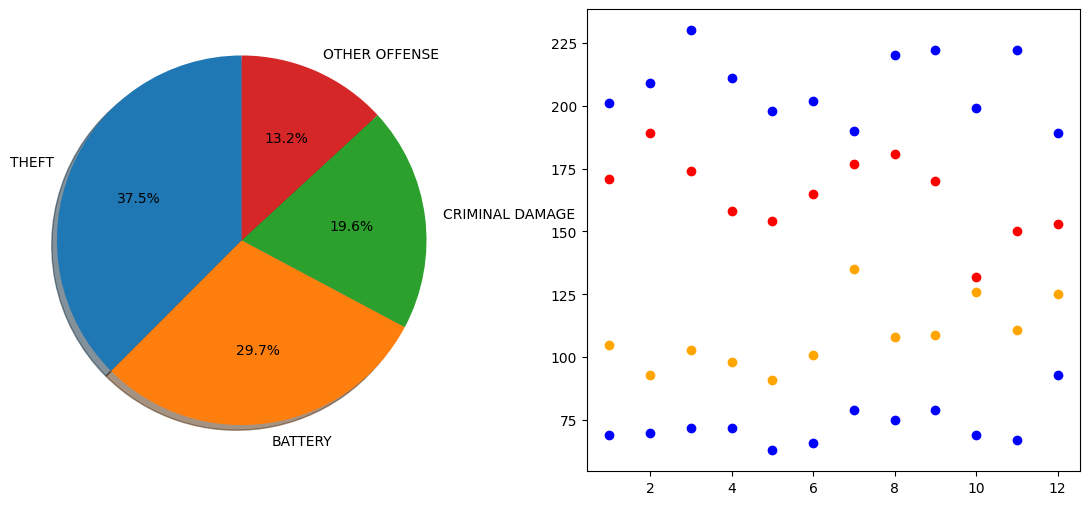

In [97]:
fig, ax=plt.subplots(figsize=(14,6), ncols=2)

ax[0].pie(tarta, labels=tarta.index, shadow=True, autopct='%1.1f%%', startangle=90)

ax[1].scatter(x=tabla_puntos.index, y=tabla_puntos['THEFT'], c='blue', label='Theft' )
ax[1].scatter(x=tabla_puntos.index, y=tabla_puntos['BATTERY'], c='red', label='Battery' )
ax[1].scatter(x=tabla_puntos.index, y=tabla_puntos['CRIMINAL DAMAGE'], c='orange', label='Criminal damage' )
ax[1].scatter(x=tabla_puntos.index, y=tabla_puntos['OTHER OFFENSE'], c='blue', label='Other offense' )
;